In [19]:
#first, let's load the parameters of the policy

import jsonpickle
policy_file_name = 'best_theta.json'
best_theta_dict = jsonpickle.decode(open(policy_file_name).read())
best_theta = best_theta_dict['theta']

In [20]:
best_theta

array([[ 0.69646919],
       [ 0.28613934],
       [ 0.22685145],
       [ 0.55131477],
       [ 0.71946897],
       [ 0.42310646],
       [ 0.9807642 ],
       [ 0.68482974],
       [ 0.4809319 ],
       [ 0.39211752],
       [ 0.34317802],
       [ 0.72904971],
       [ 0.43857225],
       [ 0.05967789],
       [ 0.39804426],
       [ 0.7379954 ],
       [ 0.18249173],
       [ 0.17545176],
       [ 0.53155137],
       [ 0.53182759],
       [ 0.63440096],
       [ 0.84943179],
       [ 0.72445532],
       [ 0.61102351],
       [ 0.72244339],
       [ 0.32295891],
       [ 0.36178866],
       [ 0.22826323],
       [ 0.29371405],
       [ 0.63097612],
       [ 0.09210494],
       [ 0.43370117],
       [ 0.43086276],
       [ 0.4936851 ],
       [ 0.42583029],
       [ 0.31226122],
       [ 0.42635131],
       [ 0.89338917],
       [ 0.94416002],
       [ 0.50183668],
       [ 0.62395295],
       [ 0.1156184 ],
       [ 0.31728548],
       [ 0.41482621],
       [ 0.86630916],
       [ 0

In [21]:
import utils
import simple_continuous_buy_sell_spy
import numpy as np
import matplotlib.pyplot as plt

In [28]:
visualize_time_length = 200

price_history = []
action_history1 = np.zeros((1,visualize_time_length+1)) #buy or sell action
action_history2 = np.zeros((1,visualize_time_length+1)) #suggested holding percentage
portfolio_value_history = []

env = simple_continuous_buy_sell_spy.simple_continuous_buy_sell_spy()
portfolio_value,price,observation = env.reset(return_price = True)

price_history.append(price)
portfolio_value_history.append(portfolio_value)

current_feature = utils.extract_features(observation)

for t in range(visualize_time_length):
    #compute an action given current observation
    action = utils.compute_action(best_theta, current_feature)
    #apply the action to the environment
    portfolio_value,price, observation,execute_action,need_to_buy,need_to_sell = env.step(action,return_price=True)
    #compute the next feature vector
    current_feature = utils.extract_features(observation)

    price_history.append(price)
    portfolio_value_history.append(portfolio_value)
    if execute_action:
        if need_to_buy:
            action_history1[0,t+1] = 2
            #print('record buy action')
        if need_to_sell:
            action_history1[0,t+1] = 1
            #print('record sell action')

    action_history2[0,t+1] = action            

In [29]:
print(len(price_history))
print(len(portfolio_value_history))
print(action_history1.shape)
print(action_history2.shape)

201
201
(1, 201)
(1, 201)


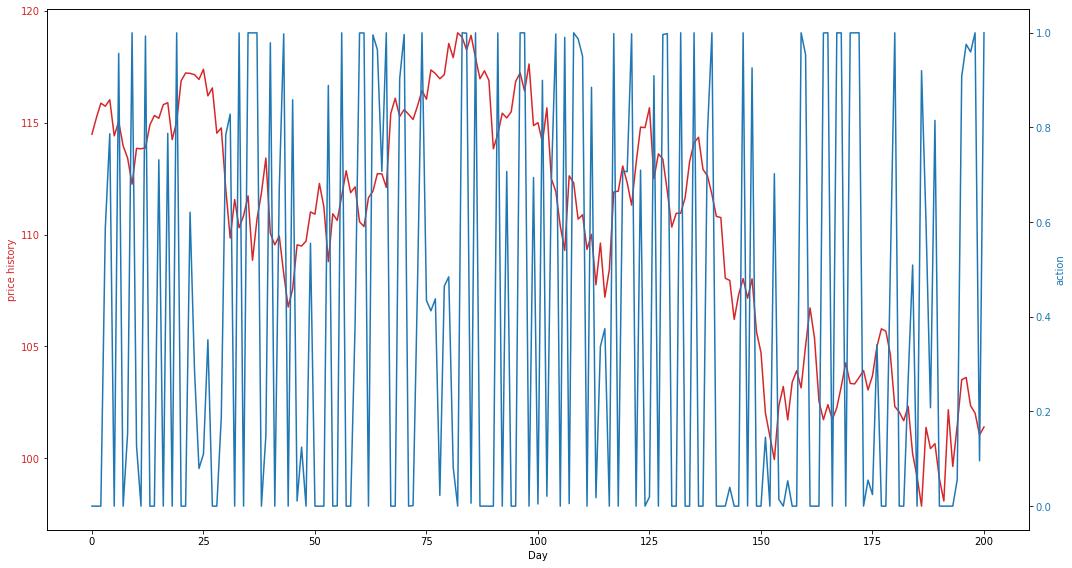

In [30]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('action', color=color)  # we already handled the x-label with ax1
ax2.plot(action_history2[0,:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

begin to plot


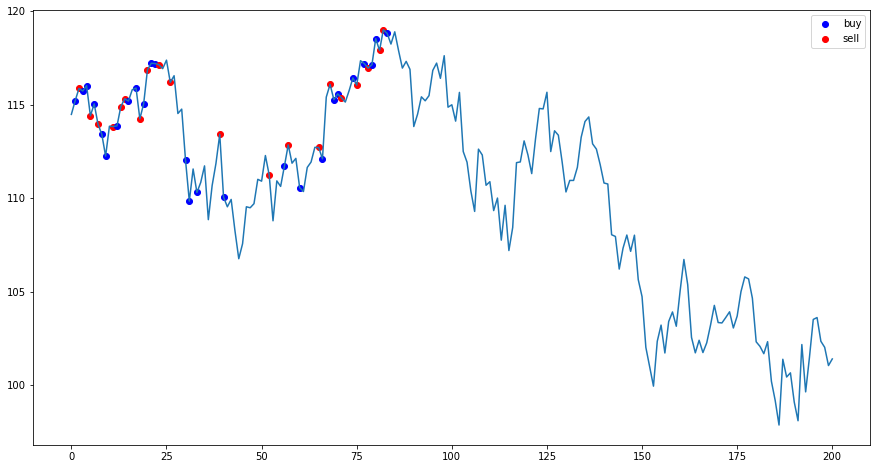

In [31]:
already_plotted_sell_legend = False
already_plotted_buy_legend = False
print('begin to plot')
plt.plot(price_history)
for time_index in range(0,len(action_history1[0])):

    if action_history1[0,time_index]==2:
        #print('the buy price is',price_history[time_index])
        if already_plotted_sell_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'b',label = 'buy')
            already_plotted_sell_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'b')

    elif action_history1[0,time_index]==1:
        #print('the sell price is',price_history[time_index])
        #print(' ')
        if already_plotted_buy_legend == False:
            plt.scatter(time_index,price_history[time_index],color = 'r',label = 'sell')
            already_plotted_buy_legend = True
        else:
            plt.scatter(time_index,price_history[time_index],color = 'r')
plt.legend()
plt.show()

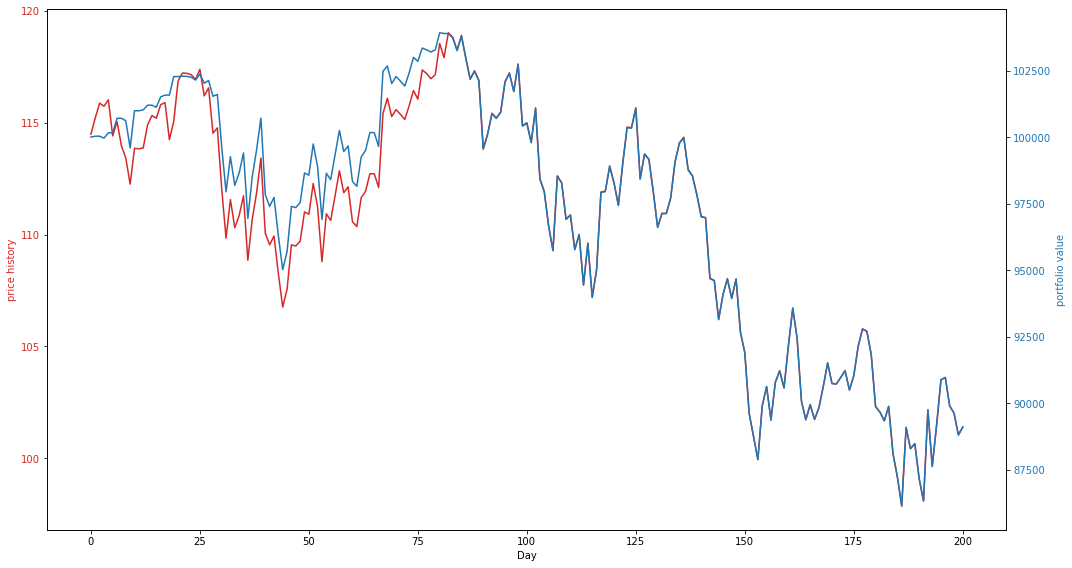

In [32]:
plt.rcParams["figure.figsize"] = (15,8)

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Day')
ax1.set_ylabel('price history', color=color)
ax1.plot(price_history, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('portfolio value', color=color)  # we already handled the x-label with ax1
ax2.plot(portfolio_value_history, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

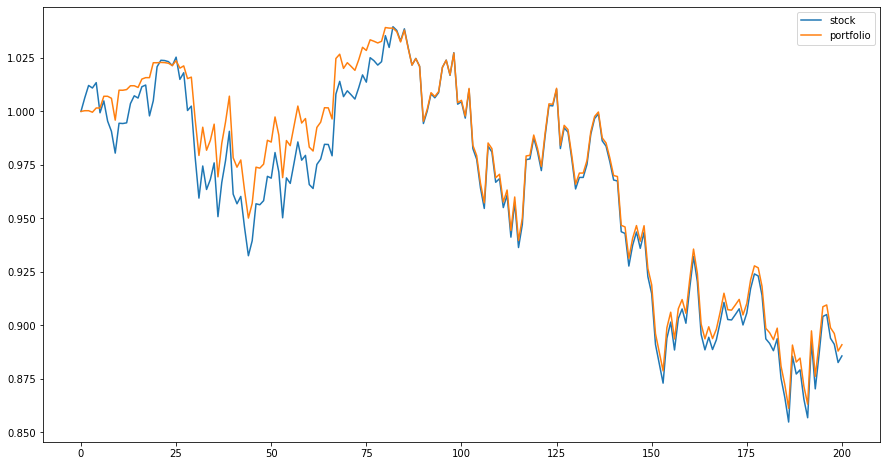

In [33]:
plt.plot(np.asarray(price_history)/price_history[0],label = 'stock')
plt.plot(np.asarray(portfolio_value_history)/portfolio_value_history[0],label = 'portfolio')
plt.legend()
plt.show()

In [34]:
#let's see on average how well the strategy is performing

portfolio_to_stock_ratios = []

for simulation_index in range(0,50):
    print('this is simulation',simulation_index)
    
    visualize_time_length = 200

    price_history = []
    action_history1 = np.zeros((1,visualize_time_length+1)) #buy or sell action
    action_history2 = np.zeros((1,visualize_time_length+1)) #suggested holding percentage
    portfolio_value_history = []

    env = simple_continuous_buy_sell_spy.simple_continuous_buy_sell_spy()
    portfolio_value,price,observation = env.reset(return_price = True)

    price_history.append(price)
    portfolio_value_history.append(portfolio_value)

    current_feature = utils.extract_features(observation)

    for t in range(visualize_time_length):
        #compute an action given current observation
        action = utils.compute_action(best_theta, current_feature)
        #apply the action to the environment
        portfolio_value,price, observation,execute_action,need_to_buy,need_to_sell = env.step(action,return_price=True)
        #compute the next feature vector
        current_feature = utils.extract_features(observation)

        price_history.append(price)
        portfolio_value_history.append(portfolio_value)
        if execute_action:
            if need_to_buy:
                action_history1[0,t+1] = 2
                #print('record buy action')
            if need_to_sell:
                action_history1[0,t+1] = 1
                #print('record sell action')

        action_history2[0,t+1] = action           
        
    
    #record the result
    portfolio_gain = portfolio_value_history[-1]/portfolio_value_history[0]
    stock_gain = price_history[-1]/price_history[0]
    portfolio_to_stock_ratio = portfolio_gain/stock_gain
    portfolio_to_stock_ratios.append(portfolio_to_stock_ratio)

this is simulation 0
this is simulation 1
this is simulation 2
this is simulation 3
this is simulation 4
this is simulation 5
this is simulation 6
this is simulation 7
this is simulation 8
this is simulation 9
this is simulation 10
this is simulation 11
this is simulation 12
this is simulation 13
this is simulation 14
this is simulation 15
this is simulation 16
this is simulation 17
this is simulation 18
this is simulation 19
this is simulation 20
this is simulation 21
this is simulation 22
this is simulation 23
this is simulation 24
this is simulation 25
this is simulation 26
this is simulation 27
this is simulation 28
this is simulation 29
this is simulation 30
this is simulation 31
this is simulation 32
this is simulation 33
this is simulation 34
this is simulation 35
this is simulation 36
this is simulation 37
this is simulation 38
this is simulation 39
this is simulation 40
this is simulation 41
this is simulation 42
this is simulation 43
this is simulation 44
this is simulation 4

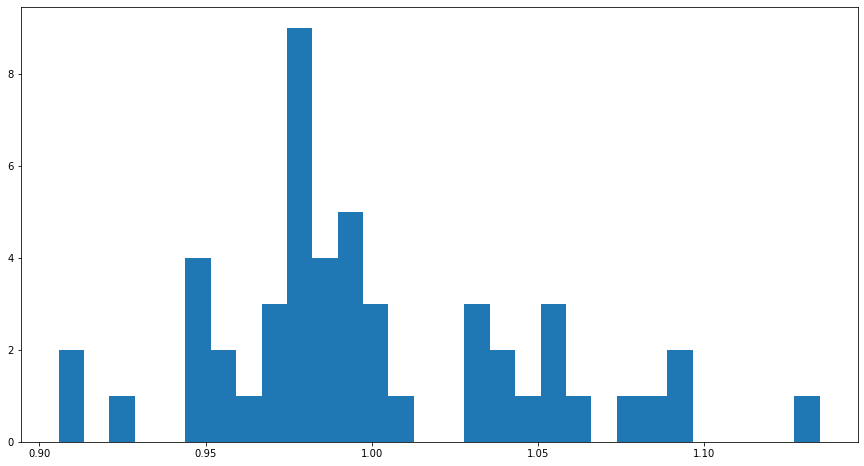

In [35]:
plt.hist(portfolio_to_stock_ratios,bins = 30)
plt.show()

In [36]:
np.mean(portfolio_to_stock_ratios)

0.9994126862158107

In [37]:
np.quantile(portfolio_to_stock_ratios, 0.25)

0.9733605650463921

In [38]:
np.quantile(portfolio_to_stock_ratios, 0.5)

0.985689694465228